## Homework 1

In this class, students will likely submit many different correct answers on most assignments. 

## Problem 1

Find a formula for the exact gradient of the sum of squares loss function based on a linear regression model with $d+1$ weights.

*Solution.* For linear regression, we have a loss function

$$L(w)=\sum\limits_{j=1}^n\left(y_j-f(x_j)\right)^2=\sum\limits_{j=1}^n\left(y_j-w_0-w_1x_{j1}-\cdots -w_dx_{jd}\right)^2$$

Taking the derivative with respect to $w_0$, we get

$$\frac{\partial L}{\partial w_0}(w) = 2\sum\limits_{j=1}^n\left(y_j-w_0-w_1x_{j1}-\cdots -w_dx_{jd}\right)(-1)$$

For each $i=1,...,d$, we have

$$\frac{\partial L}{\partial w_i}(w) = 2\sum\limits_{j=1}^n\left(y_j-w_0-w_1x_{j1}-\cdots -w_dx_{jd}\right)(-x_{ji})$$

Denote $\hat{f}(x_j)=w_0+\sum\limits_{k=1}^d w_kx_{jk}$, then the gradient is

$$\nabla L(w)=\left(2\sum\limits_{j=1}^n\left(y_j-\hat{f}(x_j)\right)(-1),2\sum\limits_{j=1}^n\left(y_j-\hat{f}(x_j)\right)(-x_{j1}),...,2\sum\limits_{j=1}^n\left(y_j-\hat{f}(x_j)\right)(-x_{jd})\right)$$

### Alternate derivation using matrix notation

Let's define some terms:

$$
X=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d}\\
1 & x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
\hspace{2cm}y=\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
\hspace{2cm}w=\begin{pmatrix}
w_0 \\ w_1 \\ \vdots \\ w_d
\end{pmatrix}
$$

Then, we have shown the loss function can be written as

$$L(w)=\|Xw-y\|_2^2$$

Let's convert the loss function into a (longer but) simpler form. Transposes can be applied to sums of matrices separately, so

$$L(w)=(Xw-y)^T(Xw-y)=((Xw)^T-y^T)(Xw-y)$$

Using the distributive property of matrix multiplication,

$$L(w)=(Xw)^T Xw-(Xw)^T y-y^T Xw+y^T y$$

If we realize $y$ and $Xw$ are both matrices of shape $n\times 1$, then we should have $(Xw)^T y=y^T Xw$, so the loss function is

$$L(w)=(Xw)^T Xw-2(Xw)^T y+y^T y$$

Since $(AB)^T=B^TA^T$ for matrices, we can simplify the terms as

$$L(w)=w^T X^T Xw-2w^T X^T y+y^T y$$

Now, of course, this is a scalar (because, in the end, the loss is just a number--the sum of squared errors), so we can take the derivatives with respect to $w_0$, ..., $w_d$ and put those into a vector as

$$\nabla L(w)=2X^T Xw-2X^T y$$

This form is a little easier to use because it's easy to implement in code.

## Problem 2

Write an implementation of linear regression by gradient descent using the exact gradient formula **instead of** a function approximating the gradient (e.g. `computeGradient`).

*Solution.* The code below is similar to what we did in class, but the gradient is computed explicitly.

In [1]:
import numpy as np

class LeastSquaresGradient:
    # initialize the hyperparameters
    def __init__(self, alpha = 0.01, tolerance = 0.01):
        self.alpha = alpha
        self.tolerance = tolerance
        
    # fit the model to the data
    def fit(self, X, y, epochs):
        n = X.shape[0]
        d = X.shape[1]
        
        # add a column of ones to the left side of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # initialize weights to 0
        self.w = [0] * (d + 1)
        
        for epoch in range(epochs):
            gradient = X.T @ (X @ self.w - y)
            gradientNorm = np.linalg.norm(gradient)
            
            if gradientNorm < self.tolerance:
                print('Gradient descent took', epoch, 'iterations to converge')
                print('The norm of the gradient is', gradientNorm)
                
                # return the approximate critical value w
                return self.w
            
            elif epoch == epochs - 1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                
                # return the weights (sometimes it is still pretty good)
                return self.w
            
            self.w -= self.alpha * gradient 
                
    # predict the output from testing data
    def predict(self, X):
        n = X.shape[0]
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([n, 1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # compute predictions  
        return np.atleast_2d((X @ self.w)).T

Let's test it on the U.S. high school graduation rate dataset just to see that it works properly.

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import pandas as pd

# import the data from the csv file to an numpy array
data = pd.read_csv('../data/US_State_Data.csv', sep=',').to_numpy()

X = np.array(data[:,1:8], dtype=float)
y = np.array(data[:,8], dtype=float)

# split the data into training and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

trainX = scale(trainX)
testX = scale(testX)

# instantiate a least squares model
model = LeastSquaresGradient(alpha = 0.01, tolerance = 0.001)

# fit the model to the training data (find the w parameters)
print('Fitting the model...\n')
model.fit(trainX, trainY, epochs = 100000)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print quality metrics
print('\nThe mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the testing set is ', mean_absolute_error(testY, predictions))

Fitting the model...

Gradient descent took 196 iterations to converge
The norm of the gradient is 0.0009910441012740167

The mean absolute error on the training set is 3.667144144634513
The mean absolute error on the testing set is  4.005061979203928


The results are equivalent to what we found in class (just a little better, actually), so our implementation seems to work!

## Problem 3

Add elastic-net regularization to your implementation. Hyperparameters $\lambda_1$ and $\lambda_2$ should be inputs to the class or the fit function.

*Solution.* To add this, we simply need to adjust the gradient to make it the gradient of the following loss function

$$L(w)=\|Xw-y\|_2^2+\lambda_1\|w\|_1+\lambda_2\|w\|^2$$

or, more conveniently,

$$L(w)=(Xw-y)^T(Xw-y) + \lambda_1\sum\limits_{i=0}^d |w_i| + \lambda_2 w^Tw$$

We already found the gradient of $(Xw-y)^T(Xw-y)$ to be $2X^T Xw-2X^T y$. The gradient of $\lambda_2 w^Tw$ is simply $2\lambda_2w$.

For $|w_i|$, the derivative depends on the value of $w_i$, so we have

$$\frac{\partial}{\partial w_i}|w_i|=
\begin{cases}
-1, &\text{if }w_i<0\\
\text{DNE}, &\text{if }w_i=0\\
1, &\text{if }w_i>0
\end{cases}$$

**Problem**: the derivative at $w_i=0$ does not actually exist. Practically, we can simply treat the derivative as 0 when this occurs, which will cause the $L^1$ regularization to not act on the parameter.

If we initialize the weights to 0, the $L^1$ penalty will not do anything in our first iteration, but as gradient descent causes the weights to become nonzero, the $L^1$ penalty will start having an effect. And, it becomes quite unlikely that the weights will return precisely to 0, so this is not much of a practical concern.

Altogether, the gradient of our sum of squared errors loss function with both $L^1$ and $L^2$ regularization will be

$$\nabla L(w)=2X^T Xw-2X^T y+\lambda_1\text{sign}(w)+2\lambda_2w$$

Note that the coefficients of 2 are actually somewhat redundant with the multipliers $\alpha$ in gradient descent weight updates and $\lambda_2$ for the $L^2$ penalty, so these 2's can be left out of the implementation.

Let's implement it!

In [3]:
import numpy as np

class LeastSquaresGradientRegularized:
    # initialize the hyperparameters
    def __init__(self, alpha = 0.01, tolerance = 0.01, lam1 = 0, lam2 = 0):
        self.alpha = alpha
        self.tolerance = tolerance
        self.lam1 = lam1
        self.lam2 = lam2
        
    # fit the model to the data
    def fit(self, X, y, epochs):
        n = X.shape[0]
        d = X.shape[1]
        
        # add a column of ones to the left side of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # initialize weights to 0
        self.w = np.array([0] * (d + 1)).astype('float')
        
        for epoch in range(epochs):
            gradient = X.T @ (X @ self.w - y) + self.lam1 * np.sign(self.w) + self.lam2 * self.w
            gradientNorm = np.linalg.norm(gradient)
            
            if gradientNorm < self.tolerance:
                print('Gradient descent took', epoch, 'iterations to converge')
                
                # return the approximate critical value w
                return self.w
            
            elif epoch == epochs - 1:
                print("Gradient descent failed to converge")
                print('The norm of the gradient is', gradientNorm)
                
                # return the weights (sometimes it is still pretty good)
                return self.w
            
            self.w -= self.alpha * gradient 
                
    # predict the output from testing data
    def predict(self, X):
        n = X.shape[0]
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([n, 1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # compute predictions  
        return np.atleast_2d((X @ self.w)).T

We will test this regularized implementation in Problem 4 below. Note that, by default, $\lambda_1=\lambda_2=0$, meaning the $L^1$ and $L^2$ penalties are turned off, and it has no effect on the gradient, so the model will run identically to the previous implementation.

If we set these hyperparameters to nonzero values, they will have an impact.

## Problem 4

Load the diabetes dataset from scikit-learn. Tune the hyperparameters of the model to predict disease progression as well as possible. Run the model at least ten different options for the hyperparameters, and document your performance.

*Solution.* Let's read in the data and split into train/dev/test sets.

In [4]:
from sklearn.datasets import load_diabetes

# read in the dataset
diabetes = load_diabetes()

# find the data and labels
X = diabetes.data
Y = diabetes.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.4)

# split the test set into dev and test sets
devX, testX, devY, testY = train_test_split(testX, testY, test_size = 0.5)

# check the dimensions
print('The dimensions of trainX is', trainX.shape)
print('The dimensions of devX is', devX.shape)
print('The dimensions of testX is', devX.shape)

The dimensions of trainX is (265, 10)
The dimensions of devX is (88, 10)
The dimensions of testX is (88, 10)


This confirms we have randomly assigned 60% of the data to the training set, 20% to the dev set, and 20% to the test set.

We need to train the model with different hyperparameter settings. A good approach is to start with minimal use of hyperparameters until we see what sort of behavior we see, so let's start with $\lambda_1=\lambda_2=0$ and tune the learning rate for quick convergence.

In [5]:
for alpha in np.linspace(0.001, 0.007, 7):
    print('================================ Running for alpha =', alpha, '================================')

    # build the linear regression model
    model = LeastSquaresGradientRegularized(alpha = alpha)

    # fit the linear regression model to the training data
    model.fit(trainX, trainY, epochs = 1000000)

    # predict the training Y's
    predictedY = model.predict(trainX)
    print('The mean absolute error on the training set is', mean_absolute_error(predictedY, trainY))

    # predict the labels of the training set
    predictedY = model.predict(devX)
    print('The mean absolute error on the dev set is', mean_absolute_error(predictedY, devY), '\n')

================================ Running for alpha = 0.001 ================================
Gradient descent failed to converge
The norm of the gradient is 0.025587414129761645
The mean absolute error on the training set is 44.301048099502694
The mean absolute error on the dev set is 42.657354633785374 

================================ Running for alpha = 0.002 ================================
Gradient descent took 616529 iterations to converge
The mean absolute error on the training set is 44.301511933793556
The mean absolute error on the dev set is 42.655587893256424 

================================ Running for alpha = 0.003 ================================
Gradient descent took 411019 iterations to converge
The mean absolute error on the training set is 44.30151193557534
The mean absolute error on the dev set is 42.65558788646962 

================================ Running for alpha = 0.004 ================================
Gradient descent took 308264 iterations to converge
The me

Increasing the learning rate results in faster convergence, but but if we increase the learning rate, we eventually reach overflows:

In [6]:
for alpha in np.linspace(0.007, 0.008, 11):
    print('================================ Running for alpha =', alpha, '================================')

    # build the linear regression model
    model = LeastSquaresGradientRegularized(alpha = alpha)

    # fit the linear regression model to the training data
    model.fit(trainX, trainY, epochs = 1000000)

    # predict the training Y's
    predictedY = model.predict(trainX)
    print('The mean absolute error on the training set is', mean_absolute_error(predictedY, trainY))

    # predict the labels of the training set
    predictedY = model.predict(devX)
    print('The mean absolute error on the dev set is', mean_absolute_error(predictedY, devY), '\n')

================================ Running for alpha = 0.007 ================================
Gradient descent took 176150 iterations to converge
The mean absolute error on the training set is 44.301511939103854
The mean absolute error on the dev set is 42.65558787302953 

================================ Running for alpha = 0.0071 ================================
Gradient descent took 173669 iterations to converge
The mean absolute error on the training set is 44.30151193928204
The mean absolute error on the dev set is 42.65558787235085 

================================ Running for alpha = 0.0072 ================================
Gradient descent took 171257 iterations to converge
The mean absolute error on the training set is 44.30151194017995
The mean absolute error on the dev set is 42.65558786893072 

================================ Running for alpha = 0.0073 ================================
Gradient descent took 168911 iterations to converge
The mean absolute error on the training

C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in matmul
C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in matmul
C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Gradient descent failed to converge
The norm of the gradient is nan


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(for homework, run more experiments...)

## Problem 5

Prove $\sigma'(z)=\sigma(z)(1-\sigma(z))$ for the sigmoid function $\sigma$.

*Solution*. By definition,

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Using the chain rule, the derivaive is

$$
\begin{align}
\sigma'(z)&=(-1)\frac{1}{\left(1+e^{-z}\right)^2}e^{-z}(-1)
\\&=\frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}}
\end{align}
$$

Adding and subtracting 1 from the numerator of the second fraction,

$$
\begin{align}
\sigma'(z)&=\frac{1}{1+e^{-z}}\frac{1+e^{-z}-1}{1+e^{-z}}
\\&=\frac{1}{1+e^{-z}}\left(1-\frac{1}{1+e^{-z}}\right)
\\&=\sigma(z)\left(1-\sigma(z)\right)
\end{align}
$$

## Problem 6

As above, let's define:

$$
X=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d}\\
1 & x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
\hspace{2cm}y=\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
\hspace{2cm}w=\begin{pmatrix}
w_0 \\ w_1 \\ \vdots \\ w_d
\end{pmatrix}
$$

where we assume the $y_i$'s are labels in the set $\{0,1\}$.

Then, we have shown the loss function can be written as

$$L(w)=\|\sigma(Xw)-y\|_2^2$$

with the $\sigma$ being applied elementwise to the vector $Xw$.

Let's convert the loss function into a (longer but) simpler form. Using the argument from Problem 1 with $Xw$ replaced by $\sigma(Xw)$, we get

$$L(w)=(\sigma(Xw))^T \sigma(Xw)-2(\sigma(Xw))^Ty +y^T y$$

The gradient is

$$
\begin{align}
\nabla L(w) &= 2X^T\sigma(Xw)\sigma'(Xw)-2X^T\sigma'(Xw) y
\end{align}
$$

Using the result from Problem 5, we can simplify the sigmoid derivatives to find

$$
\begin{align}
\nabla L(w) &= 2X^T\sigma(Xw)\sigma(Xw)\left(1 - \sigma(Xw)\right)-2X^T\sigma(Xw)\left(1 - \sigma(Xw)\right)y
\\&= 2X^T\sigma(Xw)(1 - \sigma(Xw))\left(\sigma(Xw) - y\right)
\end{align}
$$

## Problem 7

In [7]:
import numpy as np
from scipy.special import expit

class LeastSquaresClassifier:
    # initialize the hyperparameters
    def __init__(self, alpha = 0.01, tolerance = 0.01):
        self.alpha = alpha
        self.tolerance = tolerance
        
    # fit the model to the data
    def fit(self, X, y, epochs):
        n = X.shape[0]
        d = X.shape[1]
        
        # add a column of ones to the left side of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # initialize weights as uniform random variables between -1 and 1
        self.w = 2 * np.random.rand(d + 1) - 1
        
        # train the model
        for epoch in range(epochs):
            
            # compute sigmoid(Xw), which is reused many times
            sigmoidXw = expit(X @ self.w)
                        
            # compute the gradient
            gradient = X.T @ ((sigmoidXw * (1 - sigmoidXw)) * (sigmoidXw - y))
            
            # stopping conditions
            gradientNorm = np.linalg.norm(gradient)
            
            if gradientNorm < self.tolerance:
                print('Gradient descent took', epoch, 'iterations to converge')
                print('The norm of the gradient is', gradientNorm)
                
                # return the approximate critical value w
                return self.w
            
            elif epoch == epochs - 1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                
                # return the weights (sometimes it is still pretty good)
                return self.w
            
            self.w -= self.alpha * gradient
                            
    # predict the output from testing data
    def predict(self, X):
        n = X.shape[0]
        
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([n, 1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([n, 1]), X))
        
        # compute predictions  
        return np.atleast_2d(expit(X @ self.w)).T
    
    def sigmoid(self, z): return np.expit(z)

Read in data from the file

In [8]:
import pandas as pd

# read the data
df = pd.read_csv('../data/credit_default.csv', sep = ',', header = 1, index_col = 'ID')

# display the data
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


The data looks okay, but let's:

1. Extract the labels from the right column, convert to a NumPy array, and drop the column
2. Convert `SEX` and `MARRIAGE` to binary (0-1)
3. Convert the categorical input `EDUCATION` into a one-hot representation
4. Extract the data from all remaining columns

In [10]:
df = pd.read_csv('../data/credit_default.csv', sep = ',', header = 1, index_col = 'ID')

# extract the labels
Y = df['default payment next month'].to_numpy()

# drop the labels
df = df.drop(columns = ['default payment next month'])

# convert SEX and MARRIAGE into binary
df['SEX'] -= 1
df['MARRIAGE'] -= 1

# convert EDUCATION to one-hot
df = pd.get_dummies(df, columns = ['EDUCATION'])

# extract the input data
X = df.to_numpy()

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.4)

# split the test set into dev and test sets
devX, testX, devY, testY = train_test_split(testX, testY, test_size = 0.5)

# check the dimensions
print('The dimensions of trainX is', trainX.shape)
print('The dimensions of devX is', devX.shape)
print('The dimensions of testX is', devX.shape)

The dimensions of trainX is (18000, 29)
The dimensions of devX is (6000, 29)
The dimensions of testX is (6000, 29)


Next, we can build the model and train it.

Gradient descent took 5 iterations to converge
The norm of the gradient is 8.339727627545374e-05

Train Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.96      0.86     13974
           1       0.15      0.02      0.04      4026

    accuracy                           0.75     18000
   macro avg       0.46      0.49      0.45     18000
weighted avg       0.63      0.75      0.67     18000


Dev Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.96      0.86      4717
           1       0.09      0.01      0.03      1283

    accuracy                           0.76      6000
   macro avg       0.44      0.49      0.44      6000
weighted avg       0.63      0.76      0.68      6000


Dev Confusion Matrix:



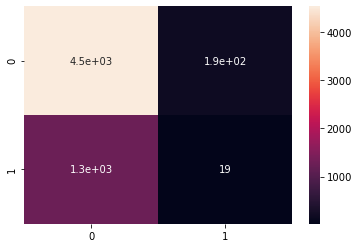

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# build the linear regression model
model = LeastSquaresClassifier(alpha = 0.00001)

# fit the linear regression model to the training data
model.fit(trainX, trainY, epochs = 1000)

# predict the training Y's of the dev set
predictedY = model.predict(trainX).round()

print('\nTrain Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the dev Y's
predictedY = model.predict(devX).round()
print('\nDev Classification Report:\n\n', classification_report(devY, predictedY))
print('\nDev Confusion Matrix:\n')

sns.heatmap(confusion_matrix(devY, predictedY), annot = True)

(run some hyperparameter experiments to improve performance hopefully)